# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

#/ Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q 
##--user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing & Feature Engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Tree-based models
from sklearn.linear_model import LogisticRegression  # Logistic regression for baseline
from xgboost import XGBClassifier  # XGBoost for boosting performance


In [2]:
# For bold text in print statements
from rich.console import Console
from rich import print

console = Console()


## Data Overview

- Observations
- Sanity checks

In [3]:
df = pd.read_csv('INNHotelsGroup.csv')


In [4]:
df.head(1)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.0,0,Not_Canceled


### Dimensions, Col names & Data types

In [5]:
# Check dimensions, column names
console.print(
    '[bold]Dataframe Shape:[/bold]\n',df.shape,'\n',
    '[bold]Columns:[/bold]\n',df.columns,'\n')

Dataframe Shape:

(36275, 19)

 Columns:
 Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
# Define colors for each data type
type_colors = {
    "object": "green",
    "int64": "red",
    "float64": "magenta"
}

# Determine the max width for alignment
max_col_width = max(len(column) for column in df.columns) + 2 # Add padding

# Build a single formatted string with alignment
output = "\n".join(
    f"{column.ljust(max_col_width)} [{type_colors.get(str(dtype), 'white')}] {dtype} [/]"
    for column, dtype in zip(df.columns, df.dtypes)
)

# Print everything at once
console.print('[bold]Data Type: [/bold]\n',output)

Data Type: 
 Booking_ID                              object 
no_of_adults                            int64 
no_of_children                          int64 
no_of_weekend_nights                    int64 
no_of_week_nights                       int64 
type_of_meal_plan                       object 
required_car_parking_space              int64 
room_type_reserved                      object 
lead_time                               int64 
arrival_year                            int64 
arrival_month                           int64 
arrival_date                            int64 
market_segment_type                     object 
repeated_guest                          int64 
no_of_previous_cancellations            int64 
no_of_previous_bookings_not_canceled    int64 
avg_price_per_room                      float64 
no_of_special_requests                  int64 
booking_status                          object 

### Missing Values & Duplicates

In [7]:
console.print('[bold]Missing Values:[/bold]\n', df.isnull().sum(),'\n',
              '\n[bold]Duplicated Rows:[/bold]', df.duplicated().sum())

Missing Values:
 Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64 
 
Duplicated Rows: 0

### Summary Statistics

In [8]:
# Numerical Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [9]:
# Categorical Statistics
df.describe(include='object').T

,count,unique,top,freq
Booking_ID,36275,36275,INN36275,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [10]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Histogram, Boxplot & Correlation Heatmap

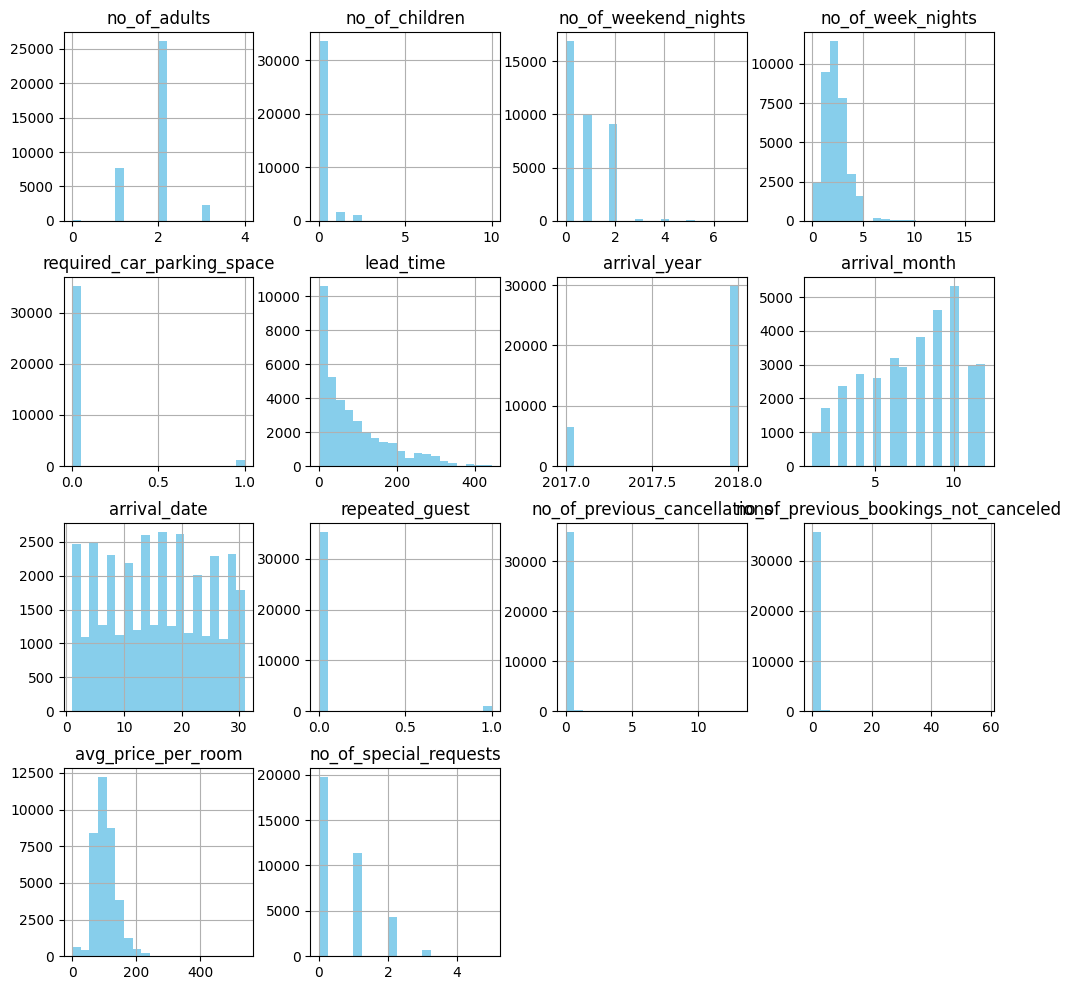

In [11]:
# Histogram to see the distribution of numerical features
df.hist(figsize=(12, 12), bins=20, color='skyblue')
plt.show()

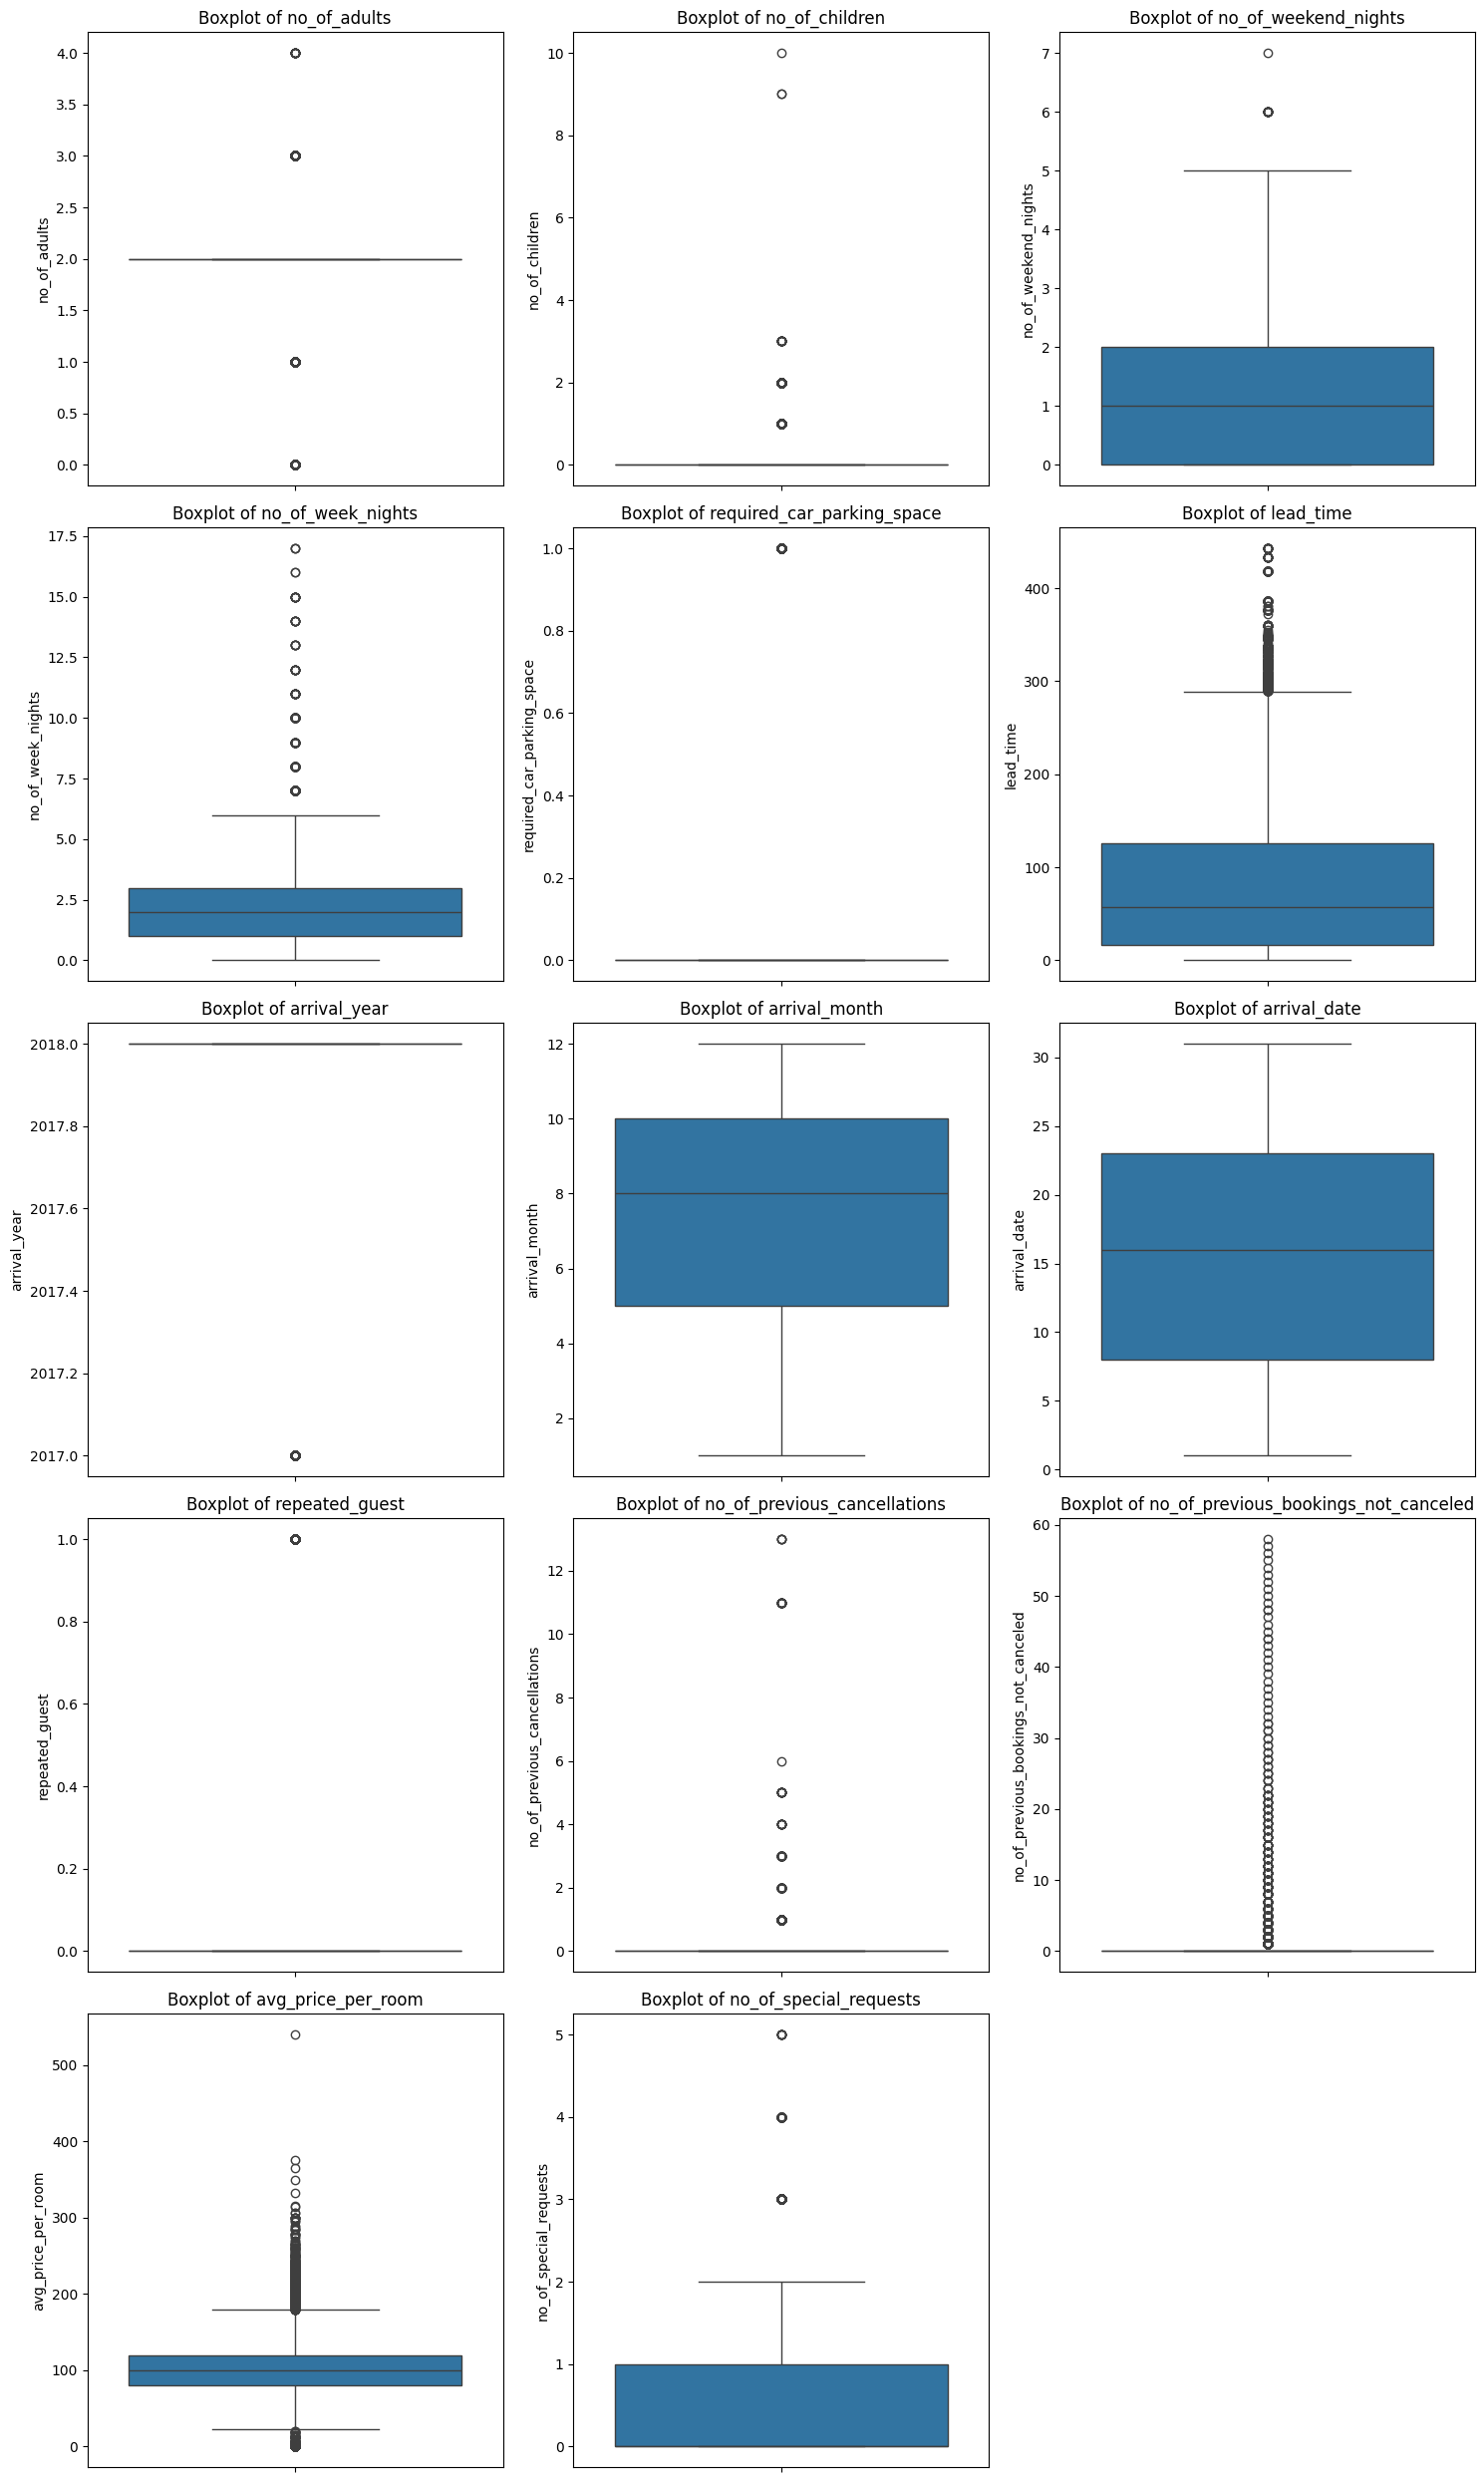

In [12]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Define the number of rows and columns for the grid
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(len(numerical_columns) / n_cols))  # Calculate the number of rows needed

# Create a figure and axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column as a boxplot
for ax, column in zip(axes, numerical_columns):
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')

# Remove any empty subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Note:
    
    To include boolean variables in the heatmap some data types must be changed

In [13]:
# dtype change to bool
df['required_car_parking_space'] = df['required_car_parking_space'].astype(bool)
df['repeated_guest'] = df['repeated_guest'].astype(bool)
df['booking_status'] = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0}).astype(bool)


    Arrival year month and date must be arranged into proper date format

In [14]:
df['arrival_datetime'] = pd.to_datetime(df[['arrival_year', 'arrival_month', 'arrival_date']].rename(columns={
    'arrival_year': 'year', 
    'arrival_month': 'month', 
    'arrival_date': 'day'
}), errors='coerce')

In [20]:
df[df['arrival_datetime'].isna()][['arrival_year', 'arrival_month', 'arrival_date']].head(2)

,arrival_year,arrival_month,arrival_date
2626,2018,2,29
3677,2018,2,29


In [22]:
# Drop columns for year month and date that are no longer needed
df.drop(columns=['arrival_year', 'arrival_month', 'arrival_date'], inplace=True)

- Note:

        Some bookings are on dates that do not exist

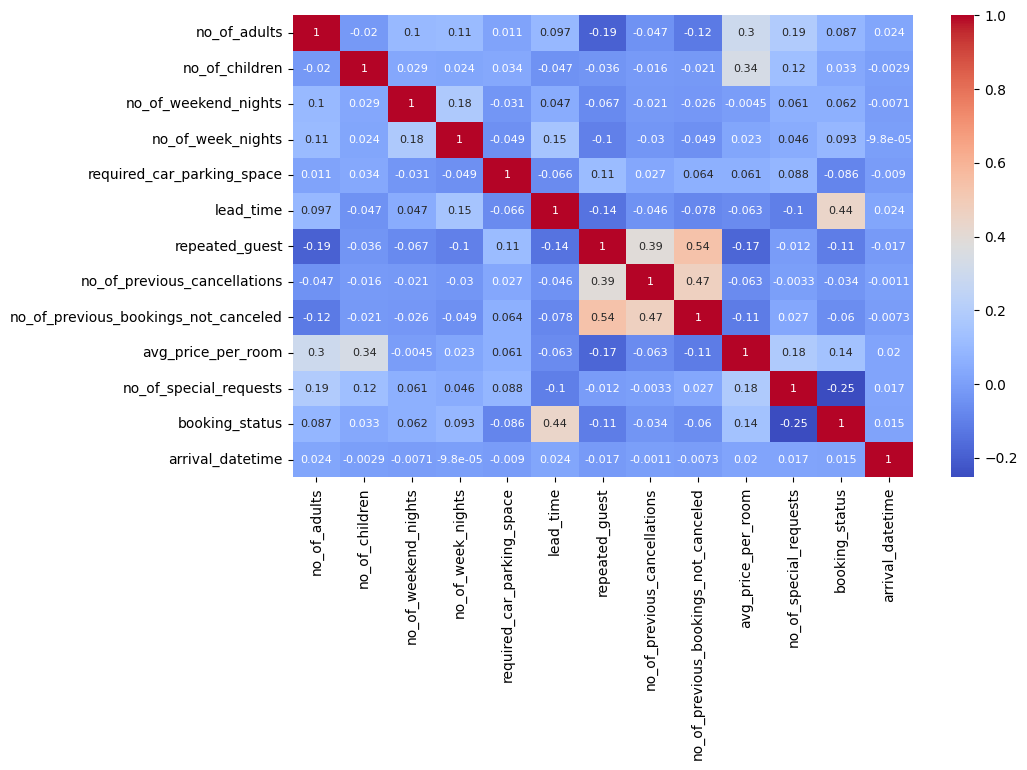

In [23]:
numerical_bool_df = df.select_dtypes(include=[np.number,bool, 'datetime64']).copy()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_bool_df.corr(), annot=True, cmap="coolwarm", annot_kws={"size": 8})
plt.show()

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

## Building a Logistic Regression model

## Model performance evaluation

## Final Model Summary

## Building a Decision Tree model

## Do we need to prune the tree?

## Model Performance Comparison and Conclusions

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?